<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Adult_Income_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/adult.csv")
data.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
data["native.country"].value_counts()

,count
native.country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [7]:
data["workclass"].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [9]:
data["occupation"].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [8]:
data.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education.num,16
marital.status,7
occupation,15
relationship,6
race,5
sex,2


In [10]:
#droping the rows with ? sign in workclass column.
data=data.drop(data[data["workclass"]=="?"].index)

In [11]:
data=data.drop(data[data["occupation"]=="?"].index)

In [12]:
data=data.drop(data[data["native.country"]=="?"].index)

In [13]:
data['income'].value_counts()

,count
income,
<=50K,22654
>50K,7508


In [14]:
num_col=data.select_dtypes(include="number").columns.tolist()
cate_col=data.select_dtypes(include="object").columns.tolist()

print("Num colu:",num_col)
print("cate colu:",cate_col)

Num colu: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
cate colu: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


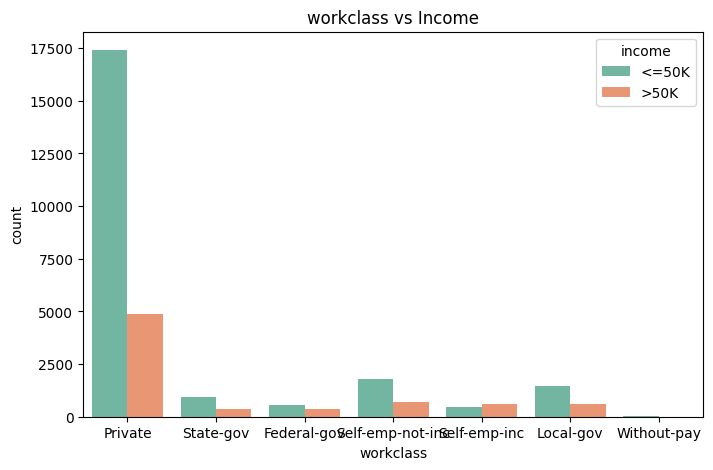

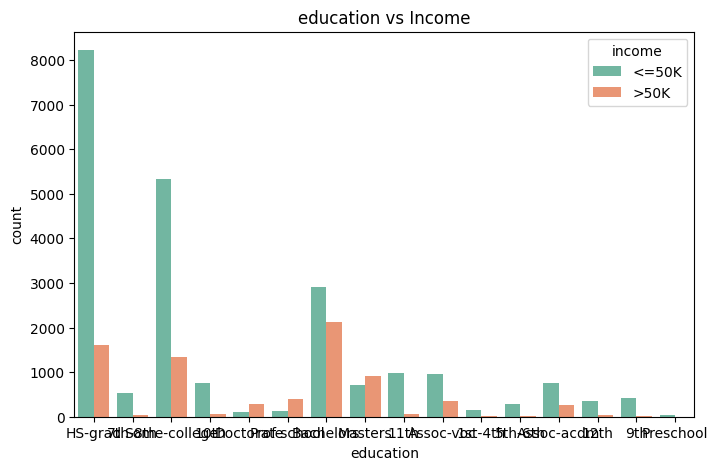

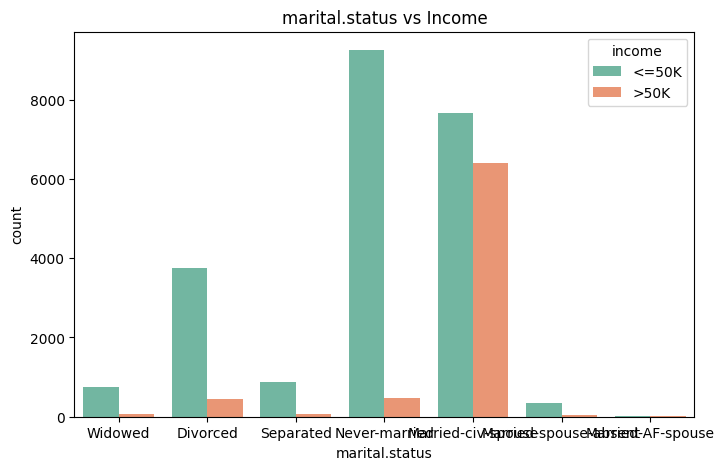

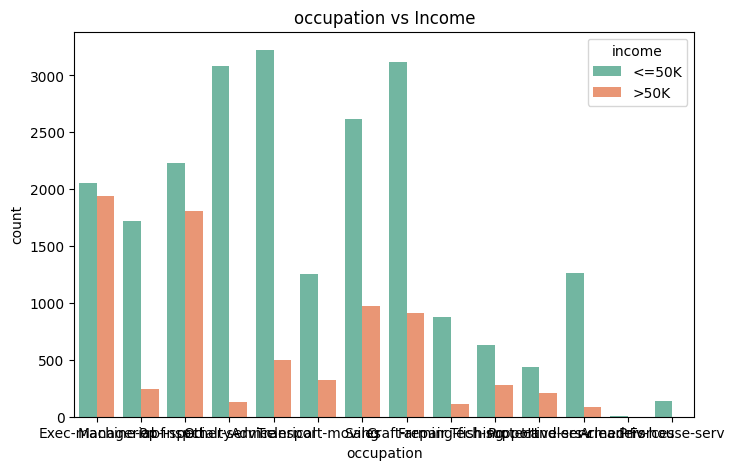

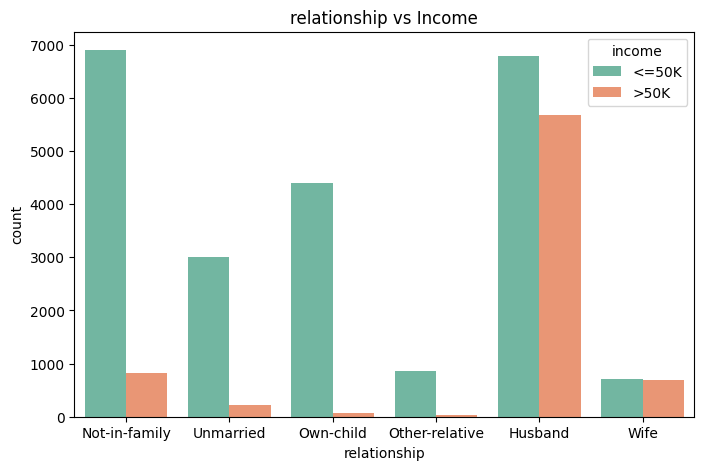

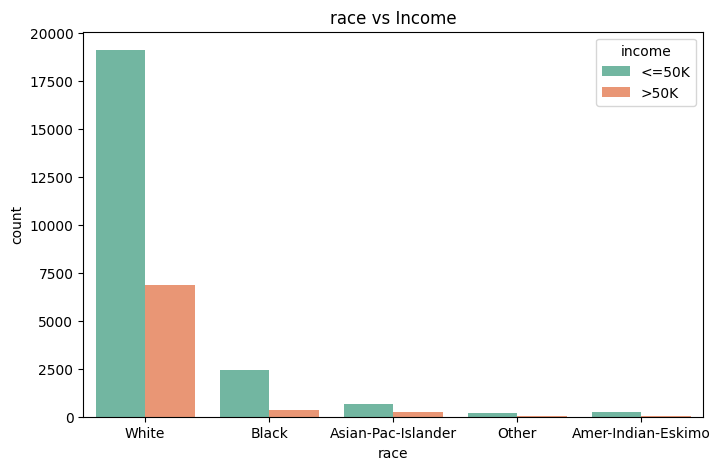

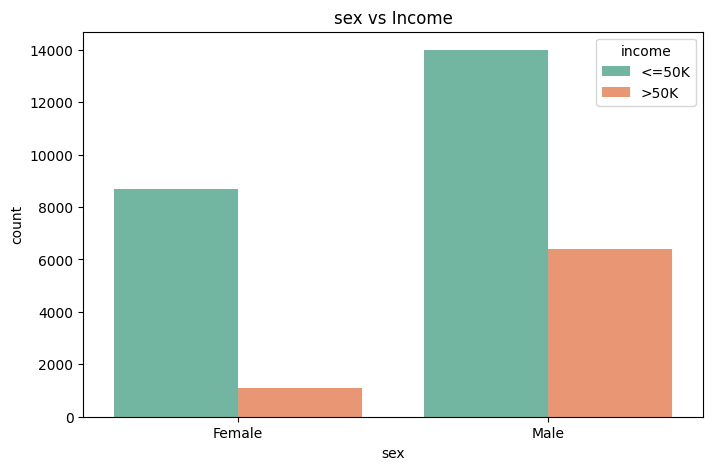

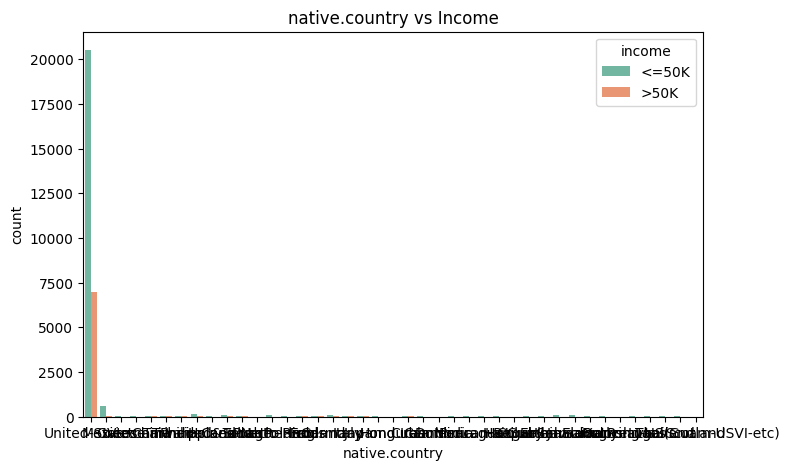

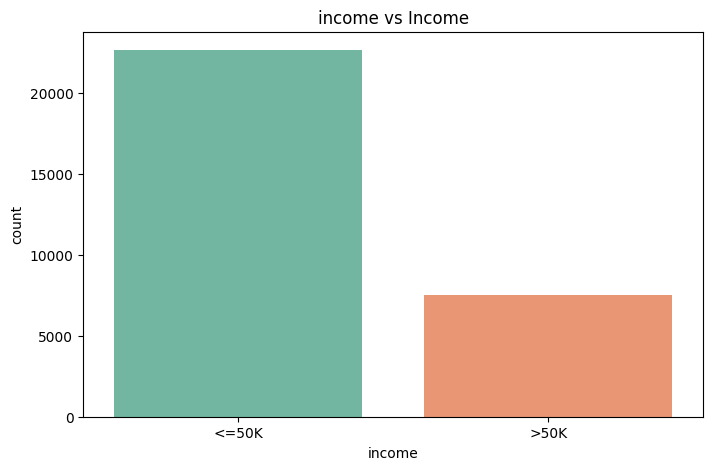

In [15]:
#Data visualisation.
for col in cate_col:
  plt.figure(figsize=(8,5))
  sns.countplot(data=data,x=col,hue="income",palette="Set2")
  plt.title(f"{col} vs Income",fontsize=12)
  plt.show()

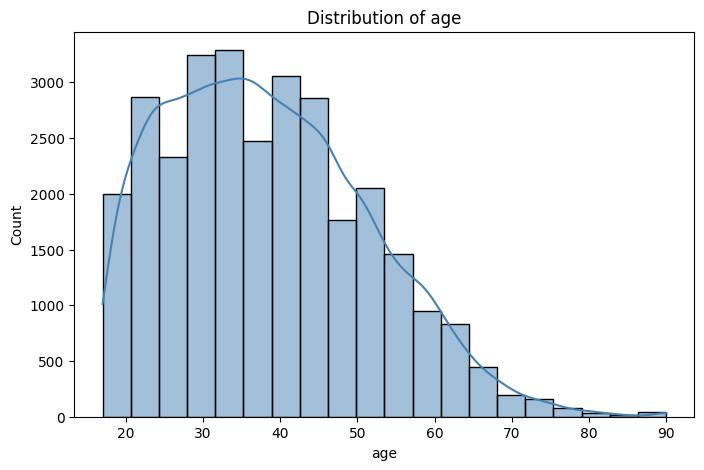

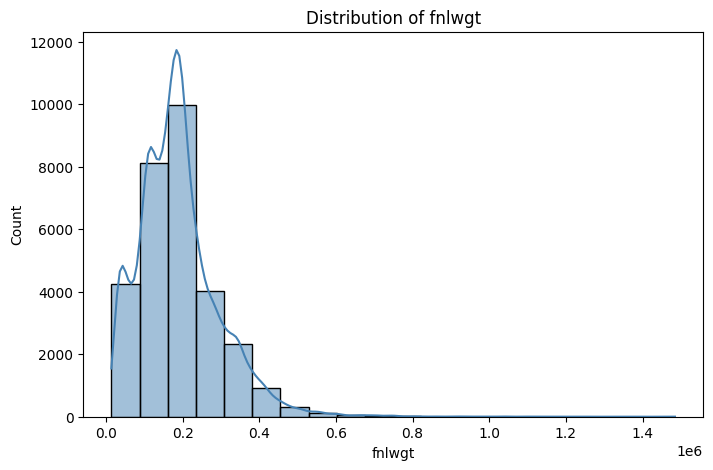

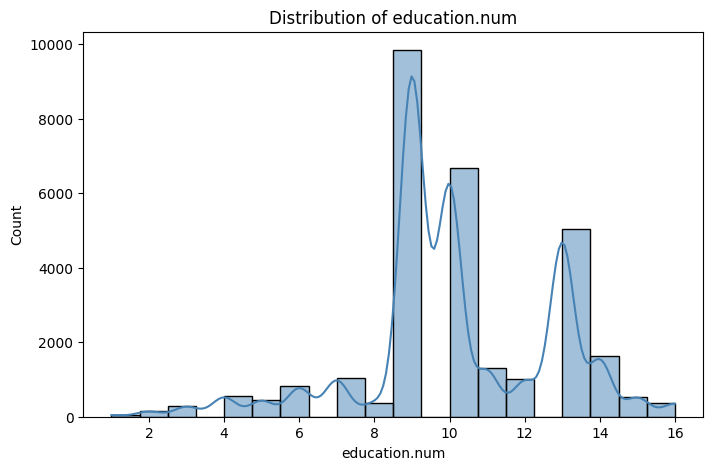

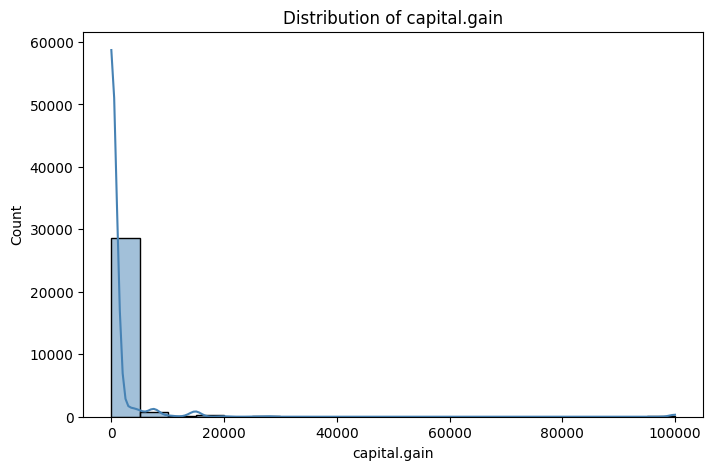

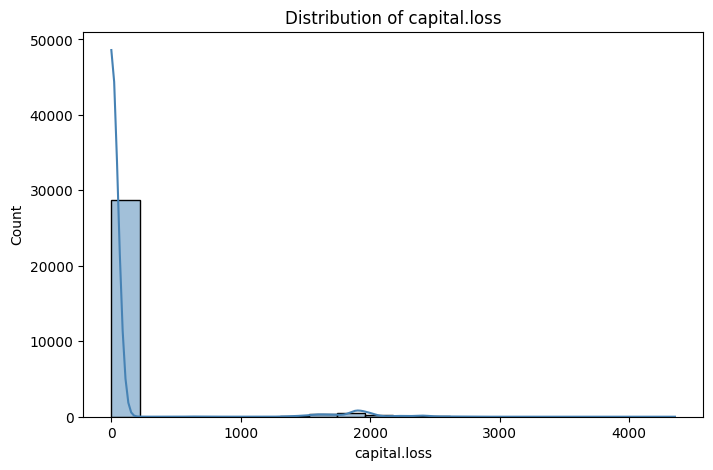

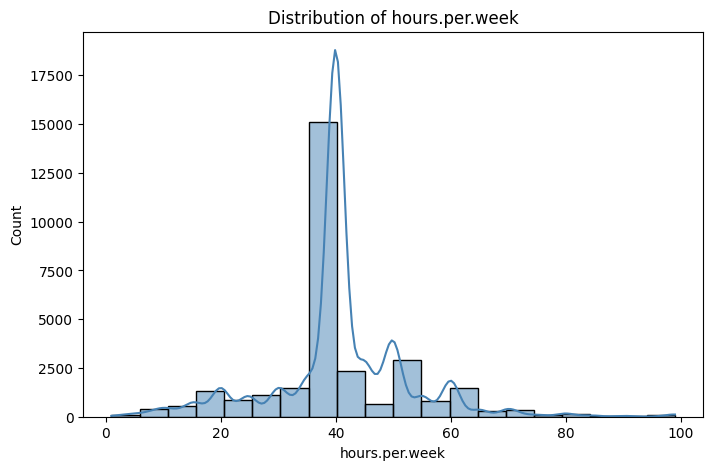

In [16]:
for col in num_col:
  plt.figure(figsize=(8,5))
  sns.histplot(data[col],bins=20,kde=True,color="steelblue")
  plt.title(f"Distribution of {col}", fontsize=12)
  plt.show()

In [17]:
#Model Building
x=data[["age","fnlwgt","capital.gain","capital.loss","hours.per.week"]]
y=data["income"]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24129, 5)
(6033, 5)
(24129,)
(6033,)


In [69]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train
x_test

In [70]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_prd=lr.predict(x_test)
y_proba=lr.predict_proba(x_test)[:,1]             #probabilities

In [72]:
print(accuracy_score(y_test,y_prd))
print(confusion_matrix(y_test,y_prd))
print(classification_report(y_test,y_prd))

0.7861760318249627
[[4336  197]
 [1093  407]]
              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      4533
        >50K       0.67      0.27      0.39      1500

    accuracy                           0.79      6033
   macro avg       0.74      0.61      0.63      6033
weighted avg       0.77      0.79      0.75      6033



In [73]:
#Randomforest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
y_pre=rfc.predict(x_test)
r_y_proba=rfc.predict_proba(x_test)[:,1]

In [75]:
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.7669484501906183
[[3949  584]
 [ 822  678]]
              precision    recall  f1-score   support

       <=50K       0.83      0.87      0.85      4533
        >50K       0.54      0.45      0.49      1500

    accuracy                           0.77      6033
   macro avg       0.68      0.66      0.67      6033
weighted avg       0.76      0.77      0.76      6033



In [76]:
from sklearn.metrics import roc_curve,roc_auc_score

In [77]:
#ROC curve
fpr_lr,tpr_lr,_=roc_curve(y_test,y_proba,pos_label=">50k")
fpr_rfc,tpr_rfc,_=roc_curve(y_test,r_y_proba,pos_label=">50k")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [78]:
#AUC score
auc_lr=roc_auc_score(y_test,y_proba)
auc_rfc=roc_auc_score(y_test,r_y_proba)

In [79]:
print(auc_lr)
print(auc_rfc)

0.7733213471578793
0.7683435546731378


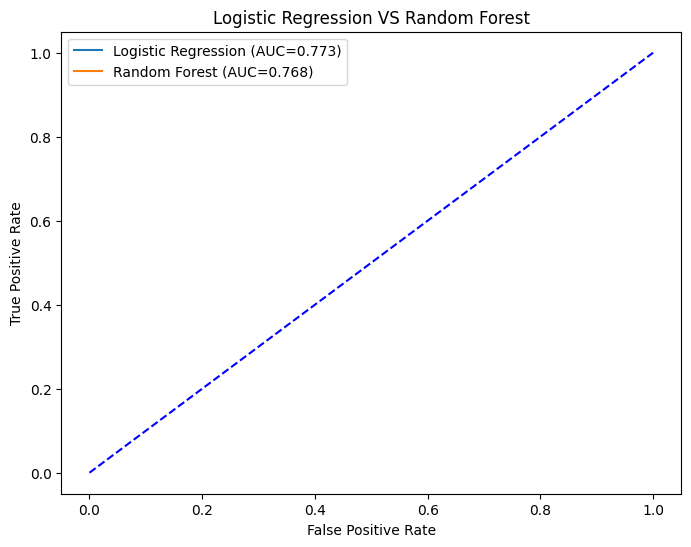

In [80]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr,tpr_lr,label=f"Logistic Regression (AUC={auc_lr:.3f})")
plt.plot(fpr_rfc,tpr_rfc,label=f"Random Forest (AUC={auc_rfc:.3f})")
plt.plot([0,1],[0,1],linestyle="--",color="blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression VS Random Forest")
plt.legend()
plt.show()